In [4]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from powerlaw import *
from collections import Counter
import scipy

# Part 0

In [3]:
G = nx.DiGraph()
#parse the "blog.txt" into graph
file_name = "blog.txt"
nodes = set()
edges = []
with open(file_name) as f:
    for line in f:
        node_a, node_b = line.strip().split(" ")
        nodes.add(node_a)
        nodes.add(node_b)
        edges.append((node_a, node_b))
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Part 1

## out_degree distribution

In [19]:
#Plot the out-degree distribution
## L4: How to Plot Power-law Degree Distribution​
# G.out_degree(['1', "514"])
#G.nodes

OutDegreeView({'1': 15, '514': 7})

In [64]:
G.out_degree(list(nodes))


OutDegreeView({'1190': 4, '24': 0, '39': 3, '475': 2, '497': 12, '633': 3, '846': 8, '1096': 0, '481': 0, '557': 14, '971': 0, '419': 2, '65': 23, '260': 35, '534': 24, '960': 4, '222': 24, '1181': 2, '692': 7, '1099': 23, '953': 11, '610': 4, '5': 46, '1045': 2, '1070': 6, '54': 1, '233': 42, '251': 0, '373': 12, '85': 1, '292': 37, '102': 39, '382': 12, '783': 17, '871': 12, '886': 5, '1001': 3, '315': 0, '1149': 0, '588': 0, '994': 4, '979': 2, '1167': 0, '581': 6, '453': 1, '569': 14, '933': 29, '228': 3, '885': 7, '814': 12, '544': 10, '650': 8, '484': 48, '177': 28, '1046': 1, '136': 0, '160': 59, '476': 6, '112': 42, '590': 1, '884': 33, '296': 27, '113': 0, '505': 0, '606': 0, '850': 21, '383': 8, '892': 79, '996': 0, '1083': 1, '256': 0, '1160': 0, '69': 10, '772': 18, '159': 109, '104': 17, '946': 0, '618': 3, '77': 0, '59': 88, '1157': 2, '815': 8, '751': 22, '265': 54, '375': 1, '489': 1, '680': 0, '625': 13, '317': 11, '55': 17, '662': 2, '116': 5, '520': 11, '129': 13, '1

D:\softwareInstall\anoconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
D:\softwareInstall\anoconda\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


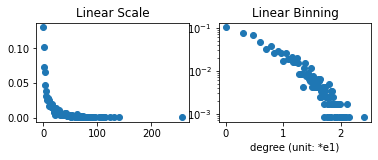

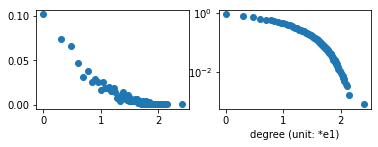

In [61]:
out_edges_distribution = list(dict(G.out_degree(list(nodes))).values())
edges_distri = out_edges_distribution

def degree_distribution(edges_distri):
    tot_edges = len(edges_distri) # sum(edges_distri)
    edges_stat = Counter(edges_distri)

    edges_stat_sorted = {key: value/tot_edges for key, value in sorted(edges_stat.items(),
                                                           key=lambda item: int(item[0]))}
    # # linear-scaled bins
    # bins_linear = np.linspace(0,len(edges_distri), len(edges_distri)+1)
    # linear_width = (bins_linear[1:] -  bins_linear[:-1])
    #
    # # log-scaled bins
    # bins_log = np.logspace(0, 3, 15)
    # log_width = (bins_log[1:] -  bins_log[:-1])


    # for linear linear scale
    plt.subplot(2,2,1)
    plt.scatter(list(edges_stat_sorted.keys()), list(edges_stat_sorted.values()))
    plt.title('Linear Scale')

    # linear binning
    ax2=plt.subplot(2,2,2)
    # np.log10(value)
    edges_stat_sorted_linear_binning = {np.log10(key): value for key, value in edges_stat_sorted.items()}
    plt.scatter(list(edges_stat_sorted_linear_binning.keys()),
                list(edges_stat_sorted_linear_binning.values()))
    plt.title('Linear Binning')
    # ax2.set_ylabel('')
    plt.yscale("log")
    ax2.set_xlabel('degree (unit: *e1)')
    plt.show()

    # log-binning
    # TODO: check it back to see the difference
    # TODO-FINAL --- any difference setting?
    plt.subplot(2,2,3)
    plt.scatter(list(edges_stat_sorted_linear_binning.keys()),
                list(edges_stat_sorted_linear_binning.values()))
    # cumulative
    ax4 = plt.subplot(2,2,4)
    probs = list(edges_stat_sorted.values())
    cumu_probl = [sum(probs[idx::1]) for idx in range(len(probs))]
    plt.scatter( [np.log10(i) for i in list(edges_stat_sorted.keys())], [i for i in list(cumu_probl)] )
    plt.yscale("log")
    ax4.set_xlabel('degree (unit: *e1)')
    return edges_stat_sorted

edges_stat_sorted = degree_distribution(edges_distri)

### fitting without xmax

In [70]:
#fit the out-degree distributon without x_max
# TODO, 1) we should first fill in the gap of the zeros, then filtered by xmin
# 2) specifically, remove the pmin usage

# staroint associated with xmin
# 3) two dimension array for xt_index = 0
# for key, value in edges_stat_sorted.items():
#     pass

results = powerlaw.Fit(list(edges_stat_sorted.values()), discrete=True)

print('Value of Exponent: ', results.power_law.alpha)
print('Minimum x-value: ', results.power_law.xmin)

### fitting wit xmax
results = powerlaw.Fit(list(edges_stat_sorted.values()), xmax=200, discrete=True)
print('Value of Exponent: ', results.power_law.alpha)
print('Minimum x-value: ', results.power_law.xmin)

# comparison only
# https://github.com/jeffalstott/powerlaw
# R, p = results.distribution_compare('power_law', 'lognormal')
# print(R, p)

Value of Exponent:  1.136249004416194
Minimum x-value:  0.015522875816993464
Value of Exponent:  1.0000028084231296
Minimum x-value:  0.011437908496732025


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [5]:
#fit the out-degree distributon with x_max = 200

## in_degree distribution

D:\softwareInstall\anoconda\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
D:\softwareInstall\anoconda\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10


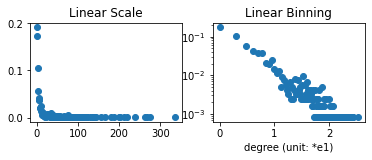

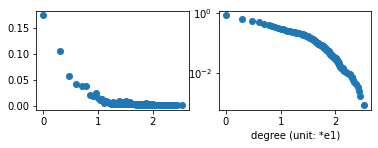

In [54]:
#Plot the in-degree distribution
in_edges_distribution = list(dict(G.in_degree(list(nodes))).values())
edges_distri = in_edges_distribution
edges_stat_sorted = degree_distribution(edges_distri)

In [63]:
#fit the in-degree distributon without x_max
### fitting with xmax
### fitting without xmax
results = powerlaw.Fit(list(edges_stat_sorted.values()), xmax=None, discrete=True)
print('Value of Exponent: ', results.power_law.alpha)
print('Minimum x-value: ', results.power_law.xmin)


### fitting wit xmax
results = powerlaw.Fit(list(edges_stat_sorted.values()), xmax=300, discrete=True)
print('Value of Exponent: ', results.power_law.alpha)
print('Minimum x-value: ', results.power_law.xmin)

2.4470437623121537
0.014705882352941176
2.4470437623121537
0.014705882352941176


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


In [8]:
#fit the in-degree distributon with x_max = 300

# Part 2

## Q1

In [76]:
#Compute the Pearson correlation coefficieient
# reference: https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.algorithms.assortativity.degree_pearson_correlation_coefficient.html

# will change (0,1) and (1, 0) to only (0,1)
undirected_G = G.to_undirected()
r=nx.degree_pearson_correlation_coefficient(undirected_G)
print(r)



# from pydoc import help
from scipy.stats.stats import pearsonr

#Create an empty graph structure (a “null graph”) with no nodes and no edges.
blog_content_undirect = nx.MultiGraph()

#Store nodes and edges
blog_content_undirect.add_nodes_from(G.nodes())
blog_content_undirect.add_edges_from(G.edges())
r = nx.degree_pearson_correlation_coefficient(blog_content_undirect, nodes= list(set(nodes)))
print('Assortativity of graph by degree: ',f"{r:3.1f}")


# a pair of adjacent nodes in each edge
corr_degree_nodeA = []
corr_degree_nodeB = []
for i in blog_content_undirect.edges():
  node_a = i[0]
  node_b = i[1]

  corr_degree_nodeA.append((blog_content_undirect.degree(node_a)))
  corr_degree_nodeB.append((blog_content_undirect.degree(node_b)))

# significance of correlation coefficient
corr, p_value = pearsonr(corr_degree_nodeA, corr_degree_nodeB)
print('correlation coefficient: ', corr)
print('p_value: ', p_value)

-0.22117675119889957
Assortativity of graph by degree:  -0.2
correlation coefficient:  -0.19641242009051185
p_value:  9.042594142358764e-165


Based on the value of the Pearson correlation coefficient, write 1-2 sentences of the graph's assortativity.


My answer:

The significance of PCC is to show you how strongly correlated the two variables/lists are. The graph is disassortative. Assortativity is expressed as a scalar value between -1 and 1. A network is said to be disassortative when, on average, high degree nodes are connected to nodes with low(er) degree and, on average, low degree nodes are connected to nodes with high(er) degree.

## Q2

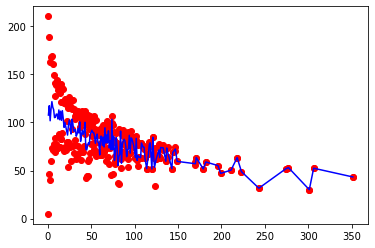

In [82]:
#Plot the average neighbor degree as a function of the node degree k

avg_node_degree = nx.average_neighbor_degree(undirected_G)
each_node_degree = {node: val for (node, val) in undirected_G.degree()}
# make the match
node_degree_2_avg_node_neighbor_degree = {}
node_degree_2_avg_node_neighbor_degree_with_std = {}
for node, degree in each_node_degree.items():
    avg_neighbor_degree = avg_node_degree[node]
    if degree in node_degree_2_avg_node_neighbor_degree:
        node_degree_2_avg_node_neighbor_degree[degree].append(avg_neighbor_degree)
    else:
        node_degree_2_avg_node_neighbor_degree[degree] = [avg_neighbor_degree]
# compute the global avg
for key in node_degree_2_avg_node_neighbor_degree.keys():
    degrees = node_degree_2_avg_node_neighbor_degree[key]
    node_degree_2_avg_node_neighbor_degree[key] = sum(degrees)/len(degrees)
    node_degree_2_avg_node_neighbor_degree_with_std[key] = np.std(degrees)
# rank for plot
sorted_results = {key: value for key, value in sorted(node_degree_2_avg_node_neighbor_degree.items(),
                                                       key=lambda item: int(item[0]))}

sorted_results_std = {key: value for key, value in sorted(node_degree_2_avg_node_neighbor_degree_with_std.items(),
                                                       key=lambda item: int(item[0]))}

sorted_results_std_low = {}
sorted_results_std_high = {}

for key in sorted_results.keys():
    sorted_results_std_low[key] = sorted_results[key] - sorted_results_std[key]
    sorted_results_std_high[key] = sorted_results[key] + sorted_results_std[key]

plt.plot(list(sorted_results.keys()), list(sorted_results.values()), c="b")
plt.scatter(list(sorted_results.keys()), list(sorted_results_std_low.values()), c="r")
plt.scatter(list(sorted_results.keys()), list(sorted_results_std_high.values()), c="r")



It is disassortative.
As we all know, a network is said to be disassortative when, on average, high degree nodes are connected to nodes with low(er) degree and, on average, low degree nodes are connected to nodes with high(er) degree.
Thus, we can see  the low degree connects to the high-degree nodes, in the left part!

At the same time, we plot the error bar to justify it! As we can see the blue line is the average neighbor degree.
And the red dots are the standard deviation+value. From this, we can see that, the value in the blue line is well
bounded by the red dots. It means that the deviation is not that large. And the result is reasonable. Especially,
we can see when the degree is larger, the deviation is relatively small.

# Part 3

## Q1

In [87]:
#plot the diameters of the LCC and the 100 G(n,p) networks

# view the graph for the checking
# for subgraph in nx.weakly_connected_components(G):
#     print(subgraph)

# advanced setting, key=len
res = max(nx.strongly_connected_components(G), key=lambda item: len(item))
print("the result node is  is: {}".format(round(len(res))))

cc_G = G.subgraph(res)
undirected_cc_G = cc_G.to_undirected()

# method 1: for the traversal
# length = dict(nx.all_pairs_dijkstra_path_length(undirected_cc_G, weight=None))
# x = []
# for u in undirected_cc_G.nodes():
#     for v in undirected_cc_G.nodes():
#     # note that, similar to the previous distribution, we inlude the the cond
#     # like the previous solution, we can have u != v to exlude some pairs
#     # for simplicity, we remove this
#     x.append(length[u][v])
#     x, count = np.unique(x, return_counts=True)
# # we should only consider the half of the value
# plt.bar(x, count/2)

# method 2:

def shortest_path_finding(graph):
    length = dict(nx.all_pairs_dijkstra_path_length(graph, weight=None))
    nodes_list = list(graph.nodes())
    shortest_paths = []
    for i in range(0, len(nodes_list)-1):
        # print(i)
        for j in range(i+1, len(nodes_list)):
            # TODO: in gnp graph, we may have no path i and j then, ignore it
            try:
                shortest_paths.append(length[nodes_list[i]][nodes_list[j]])
            except KeyError:
                continue
    # print("stop one round")
    return shortest_paths

# length = dict(nx.all_pairs_dijkstra_path_length(undirected_cc_G, weight=None))
# nodes_list = list(undirected_cc_G.nodes())
# shortest_paths = []
# for i in range(0, len(nodes_list)-1):
#     for j in range(i+1, len(nodes_list)):
#         shortest_paths.append(length[nodes_list[i]][nodes_list[j]])
# shortest_paths = nx.diameter(undirected_cc_G)  # shortest_path_finding(undirected_cc_G)
org_diameter = nx.diameter(undirected_cc_G) # max(shortest_paths)
org_avg_shorted_path = nx.average_shortest_path_length(undirected_cc_G) # sum(shortest_paths)/len(shortest_paths)
# print("the diameter is: ", max(shortest_paths))
# print("the average of the shortest paths is: ", sum(shortest_paths)/len(shortest_paths))

num_node = len(undirected_cc_G.nodes())
num_ege = len(undirected_cc_G.edges())
p = num_ege/(num_node*(num_node-1)/2) # previous, not edge, but node
# generate the G(n,p) graph
diameters = []
avg_shortest_path = []
gnp_graphs = []
for iteration in range(100):
    gnp_graph = nx.gnp_random_graph(num_node, p)
    gnp_graphs.append(gnp_graph)
    # shortest_paths = shortest_path_finding(gnp_graph)
    diameters.append(nx.diameter(gnp_graph)) #(max(shortest_paths))
    avg_shortest_path.append(nx.average_shortest_path_length(gnp_graph)) # (sum(shortest_paths)/len(shortest_paths))

print("the avg diamter of 100 gnp graph is: ", sum(diameters)/len(diameters))
print("the avg avg shortest path of 100 gnp graps is: ", sum(avg_shortest_path)/len(avg_shortest_path))


the result node is  is: 793
the avg diamter of 100 gnp graph is:  3.0
the avg avg shortest path of 100 gnp graps is:  2.1788622989032826


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5]),
 <a list of 10 Patch objects>)

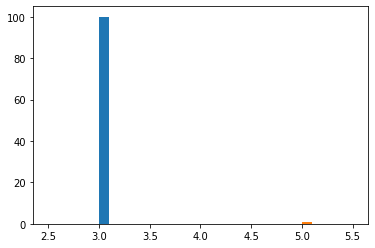

In [88]:
# figure commparison

plt.hist(diameters)
plt.hist(org_diameter)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([1.92359917, 2.02359917, 2.12359917, 2.22359917, 2.32359917,
        2.42359917, 2.52359917, 2.62359917, 2.72359917, 2.82359917,
        2.92359917]),
 <a list of 10 Patch objects>)

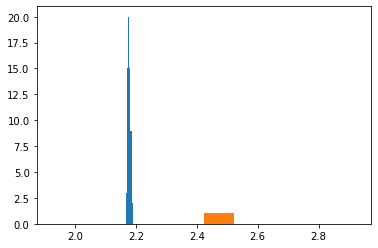

In [89]:
plt.hist(avg_shortest_path)
plt.hist(org_avg_shorted_path)

In [112]:
# problem,  the function does not pass gnp graph

# print("stop one round")

## Q2
It is computed in the above programs.

In [129]:
#plot the average shortest path length of the LCC and the 100 G(n,p) networks
# for Part 3-3
# for the Gaussian distribution, we can get the average from the previous experiments,
# then, we can use the average results to simulate the Gaussian distributions results
# TODO: to check and think

def sequence_significance_test(seq, tested_value):
    lower_bound = np.mean(seq) - 1.96* np.std(seq)/np.sqrt(len(seq))
    higher_bound = np.mean(seq) + 1.96* np.std(seq)/np.sqrt(len(seq))
    if lower_bound <= tested_value and tested_value <= higher_bound:
        print(" it is not statistically significant ")
    elif tested_value < lower_bound:
        print(" the tested value (orignial value) is smaller than the opposite part of the random generation with 95% \
        confidence")
    else:
        assert tested_value > higher_bound
        print(" the tested value (orignial value) is larger than the opposite part of the random generation with 95% \
        confidence")

print("for the diamter, we have: ")
sequence_significance_test(diameters, org_diameter)

print("for the average shortest path, we have: ")
sequence_significance_test(avg_shortest_path, org_avg_shorted_path)

4.877763982124316

Can we say with statistical significance of 95% that the former is smaller (or larger) than the diameter or the average shortest path lengths of the corresponding random networks and give appropriate reason why is this difference happen?
Yes.

Yes, the result is presented. TODO-FINAL
# Part 4

## Q1

{'39': 0.2648221343873518, '633': 1.0, '846': 0.28792912513842744, '557': 0.39766081871345027, '65': 0.47, '260': 0.5040650406504065, '534': 0.21841704718417046, '960': 0.5, '222': 0.22345175694039993, '692': 0.6111111111111112, '953': 0.2222222222222222, '5': 0.12109459168282698, '1045': 1.0, '1070': 0.4, '54': 1.0, '233': 0.22995169082125605, '373': 0.3333333333333333, '292': 0.5397435897435897, '102': 0.463768115942029, '382': 0.6909090909090909, '783': 0.5416666666666666, '871': 0.23809523809523808, '886': 0.23636363636363636, '1001': 0.5, '994': 0.3333333333333333, '979': 1.0, '581': 0.26143790849673204, '933': 0.3671497584541063, '228': 0, '885': 0.26666666666666666, '814': 0.3787878787878788, '650': 0.25, '484': 0.3690821256038647, '177': 0.12538176265270506, '1046': 0, '160': 0.19051799824407376, '476': 0.2, '112': 0.4485370950888192, '884': 0.4211822660098522, '296': 0.5320197044334976, '850': 0.4166666666666667, '383': 0.6190476190476191, '892': 0.2872444011684518, '1083': 1.

TypeError: values() takes no arguments (1 given)

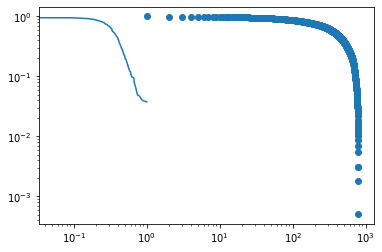

In [90]:
# TODO: to check it carefully and learn it well
#plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format
# the previous graph setting



cluster_coefficient_g_sub = nx.clustering(undirected_cc_G)
print(cluster_coefficient_g_sub)

# plt.scatter(range(len(cluster_coefficient_g_sub)), cluster_coefficient_g_sub.values())
probs = list(dict(cluster_coefficient_g_sub).values())
cumu_probl = [sum(probs[idx::1])/sum(probs) for idx in range(len(probs))]
plt.scatter(range(len(probs)), cumu_probl)

cluster_coefficient_gnp = nx.clustering(gnp_graph)
print(cluster_coefficient_gnp)

########################
cluster_coefficient_g_sub = nx.clustering(undirected_cc_G)
probs = list(dict(cluster_coefficient_g_sub).values())

nodes = undirected_cc_G.number_of_nodes()
edges = undirected_cc_G.number_of_edges()
p = edges * 2/(nodes*(nodes-1))


plot_ccdf(data=probs)


rd_graph = nx.fast_gnp_random_graph(nodes, p)

rd_graph_coeff = list(nx.clustering(rd_graph).values(()))
plot_ccdf(data =rd_graph_coeff)

from scipy.stats import ks_2samp

ks_statistic, p_value = ks_2samp(probs, rd_graph_coeff)
print('ks_statistic: ', ks_statistic)
print('p_value: ', p_value)



# TODO: to check distribution, but give some initial results

Are the two distributions statistically different?

Yes,  P-value below 0.05 would indicate that the two samples are from different distributions.

## Q2

In [ ]:
#Plot the average clustering coefficient as a function of the node degree 
# Local Clustering Coefficient (LCC)

# first, we should compute the degeree of each node
# node2degree = undirected_cc_G.degrees()
# then we match the cluster coefficient fo the nod
# node2cluster_efficient = nx.clustering(undirected_cc_G)
# # plot and build
#
# # modular function building
# def node_degree_2_function_match(undirected_G, node_function):
#     each_node_degree = {node: val for (node, val) in undirected_G.degree()}
#     # make the match
#     node_degree_2_function_result_list = {}
#     for node, degree in each_node_degree.items():
#         node_function = dict(node_function)
#         # TODO: some nodes are not included: be careful to check it
#         # intuitively, the whole nodes should be considered
#         try:
#             function_result_one_node = node_function[node]
#         except KeyError:
#             continue
#
#         if degree in node_degree_2_function_result_list:
#             node_degree_2_function_result_list[degree].append(function_result_one_node)
#         else:
#             node_degree_2_function_result_list[degree] = [function_result_one_node]
#     # compute the global avg
#     for key in node_degree_2_function_result_list.keys():
#         function_results = node_degree_2_function_result_list[key]
#         node_degree_2_function_result_list[key] = sum(function_results)/len(function_results)
#
#     node_degree_2_function_result_list = {key: value for key, value in sorted(node_degree_2_function_result_list.items(),
#                                                        key=lambda item: int(item[0]))}
#     return node_degree_2_function_result_list
#
# node_degree_2_function_result_list = node_degree_2_function_match(undirected_G, node2cluster_efficient)
#
# plt.scatter(list(node_degree_2_function_result_list.keys()), list(node_degree_2_function_result_list.values()))

In [ ]:
# undirected_cc_G

#Plot the average clustering coefficient as a function of the node degree

max_degree = 0
for i in undirected_cc_G.nodes():
  if undirected_cc_G.degree(i) > max_degree:
    max_degree = undirected_cc_G.degree(i)

# print('max_degree of G_0: ', max_degree)

node_degree = np.linspace(2,max_degree, max_degree-1 )
# print(node_degree)
ave_coeff = []

total_coeff= np.zeros((max_degree+1)) # store the sum of neighbor degree corresponding to the specific number of degree
cor_degree = np.zeros((max_degree+1)) # store the number of nodes corresponding to the specific number of degree


for i in undirected_cc_G.nodes():
  cor_degree[undirected_cc_G.degree(i)] +=1
  neighbor = [n for n in undirected_cc_G[i]] # the neighbors of node i
  count = 0

  for j in neighbor: # node j is the neighbor of node i
    nei_neighbor = [n for n in undirected_cc_G[j]] # the neighbors of node j
    for u in nei_neighbor:
      if u in neighbor: # if the neighbor of node j is also node i's neighbor --> friendship triangle
        count += 1

  k = undirected_cc_G.degree(i)
  if k >=2:
    coeff = count / (k * (k-1))
    total_coeff[undirected_cc_G.degree(i)] += coeff

ave_coeff = np.where(np.isnan(total_coeff/cor_degree), 0, total_coeff/cor_degree)


plt.figure()
plt.scatter(node_degree, ave_coeff[2:])
plt.ylim([0.01, 0.7])
plt.figure()


What do you observe based on the above visualization?

There is a negative relationship between the average clustering coefficient and the node degree. And the this phenomonon can be statistically siginficant.

## Q3

In [158]:
#plot the transitivity coefficient of the overall network of the LCC and the 100 G(n,p) networks
# TODO
# code: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.cluster.transitivity.html
transitivity = nx.transitivity(undirected_cc_G)

# similarly, we have:

transitivity_gnp_graph = nx.transitivity(gnp_graph)

Combining the results of Part-3 and Part-4, can we conclude that the undirected LCC of Part-1 network is a small-world network or not?

# Part 5

In [18]:
#Part 5
# TODO
# method one:
# for the general triangle computations:
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.cluster.triangles.html#networkx.algorithms.cluster.triangles
# we can build the collections of any three-node combination, then use triplet to check existance
# method two:
# we try to get the weakly-connected components with length of three
# then, update it, like the link:
# link: https://stackoverflow.com/questions/54789591/how-to-find-all-triplets-of-nodes-connected-components-of-size-3-from-a-tsv-fi


res = max(nx.strongly_connected_components(G), key=lambda item: len(item))
print("the result is: {}".format(len(res)))

cc_G = G.subgraph(res)

triplets = [c for c in nx.weakly_connected_components(cc_G) if len(c) == 3]
# get the initial triplets
print(len(triplets))
# check the special triplet schedule
# for type 9 checking: by checking, one by one, [(1, 1), (1, 1), (1, 1)]

# for type 5 checking: actually, the list of (in_degree_num, out_degree_num) combination
# will be unique as this point, [(0, 2), (1, 1), (2, 0)]

count = 0
for node_a, node_b, node_c in triplets:
    triplet_G = G.subgraph([node_a, node_b, node_c])
    # present the indegree and outdegree distributions and
    indegrees = triplet_G.in_degree()
    outdegrees = triplet_G.out_degree()

    result_list = []
    for node in indegrees:
        result_list.append((indegrees[node], outdegrees[node]))
    result_list = sorted(result_list, key=lambda item: item[0])
    if result_list ==  [(1, 1), (1, 1), (1, 1)] or result_list == [(0, 2), (1, 1), (2, 0)]:
        count += 1
print("the total count is: {}".format(count))

the result is: 793
0
the total count is: 0


In [16]:
# for the part 2, we can see this: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.degree_seq.directed_configuration_model.html
# 
# # this method fails
# for c in nx.weakly_connected_components(cc_G):
#    if len(c) == 3:
#        print(c)

TypeError: object of type 'generator' has no len()

In [21]:
undirected_cc_G = cc_G.to_undirected()
all_cliques= nx.triangles(undirected_cc_G)
triad_cliques=[x for x in all_cliques if len(x)==3 ]

In [24]:
triplets = [c for c in nx.connected_components(undirected_cc_G) if len(c) == 3]

In [38]:
# antoher method, try the bfs and use the set to store the results

# result not good, since the result is 39,5;then 5, 8, like this
# triplets = set()
# count = 0
# for node in undirected_cc_G.nodes():
#     node_bfs_res = list(nx.bfs_edges(undirected_cc_G, node, depth_limit=2))
#     for node_bfs_one in node_bfs_res:
#         node_a, node_b, node_c = node_bfs_one
#
#         triplet_G = cc_G.subgraph([node_a, node_b, node_c])
#         # present the indegree and outdegree distributions and
#         indegrees = triplet_G.in_degree()
#         outdegrees = triplet_G.out_degree()
#
#         result_list = []
#         for node in indegrees:
#             result_list.append((indegrees[node], outdegrees[node]))
#         result_list = sorted(result_list, key=lambda item: item[0])
#         if result_list ==  [(1, 1), (1, 1), (1, 1)] or result_list == [(0, 2), (1, 1), (2, 0)]:
#             count += 1

# approach, method: by traversal the neiborhoods
# for node in undirected_cc_G.nodes():
#
#     neighbors = undirected_cc_G.neighbors(node)
#
#     for neighbor in neighbors:
#         neighbor_of_neighbor = undirected_cc_G(neighbor)
#
#     for node_bfs_one in node_bfs_res:
#         node_a, node_b, node_c = node_bfs_one
#
#         triplet_G = cc_G.subgraph([node_a, node_b, node_c])
#         # present the indegree and outdegree distributions and
#         indegrees = triplet_G.in_degree()
#         outdegrees = triplet_G.out_degree()
#
#         result_list = []
#         for node in indegrees:
#             result_list.append((indegrees[node], outdegrees[node]))
#         result_list = sorted(result_list, key=lambda item: item[0])
#         if result_list ==  [(1, 1), (1, 1), (1, 1)] or result_list == [(0, 2), (1, 1), (2, 0)]:
#             count += 1

# finally set form this

def count_triplet(graph):
  FFL_count = 0
  DC_count = 0
  for a in graph.nodes():
    for b in graph.neighbors(a): # node b is the out_degree of node a
      for c in graph.neighbors(b):
          if c != a:
            triplet_G = graph.subgraph([a, b, c])
            # dict from list (xx: bb) to the dictiionay
            indegrees = dict(triplet_G.in_degree())
            outdegrees = dict(triplet_G.out_degree())
            result_list = []
            for node in indegrees:
                result_list.append((indegrees[node], outdegrees[node]))
            result_list = sorted(result_list, key=lambda item: item[0])
            if result_list ==  [(1, 1), (1, 1), (1, 1)]:
                FFL_count += 1
            if  result_list == [(0, 2), (1, 1), (2, 0)]:
                DC_count += 1
  return FFL_count, DC_count


        # node c is the out_degree of node b
            # if c in graph.neighbors(a): # if node c is also the out_degree of node a --> feed-forward loop
            #   FFL_count += 1
            # if c in graph.predecessors(a): # if node c is the in_degree of node a --> direct cycle
            #   DC_count += 1


FFL_count, DC_count = count_triplet(cc_G)
print('the number of FFL: ', FFL_count)
print('the number of DC: ', DC_count)

the number of FFL:  1434
the number of DC:  39306


In [39]:
# try the neigborhodd search



Which of the previous triplet types are statistically more common (or less common) in the network of the LCC compared to what we would expense based on chance?